<a href="https://colab.research.google.com/github/KacperLatecki/Zadania_ED/blob/main/Zadanie_integracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

Kolumny CO2: Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')
Kolumny ENERGY: Index(['Entity', 'Code', 'Year', 'Primary energy consumption (TWh)'], dtype='object') 

       Year  Annual CO₂ emissions (per capita)
19063  1800                           0.045189
19064  1801                           0.048900
19065  1802                           0.049344
19066  1803                           0.050177
19067  1804                           0.049414
      Year  Primary energy consumption (TWh)
9734  1965                         776.05330
9735  1966                         791.17820
9736  1967                         814.29987
9737  1968                         876.36676
9738  1969                         936.06604 



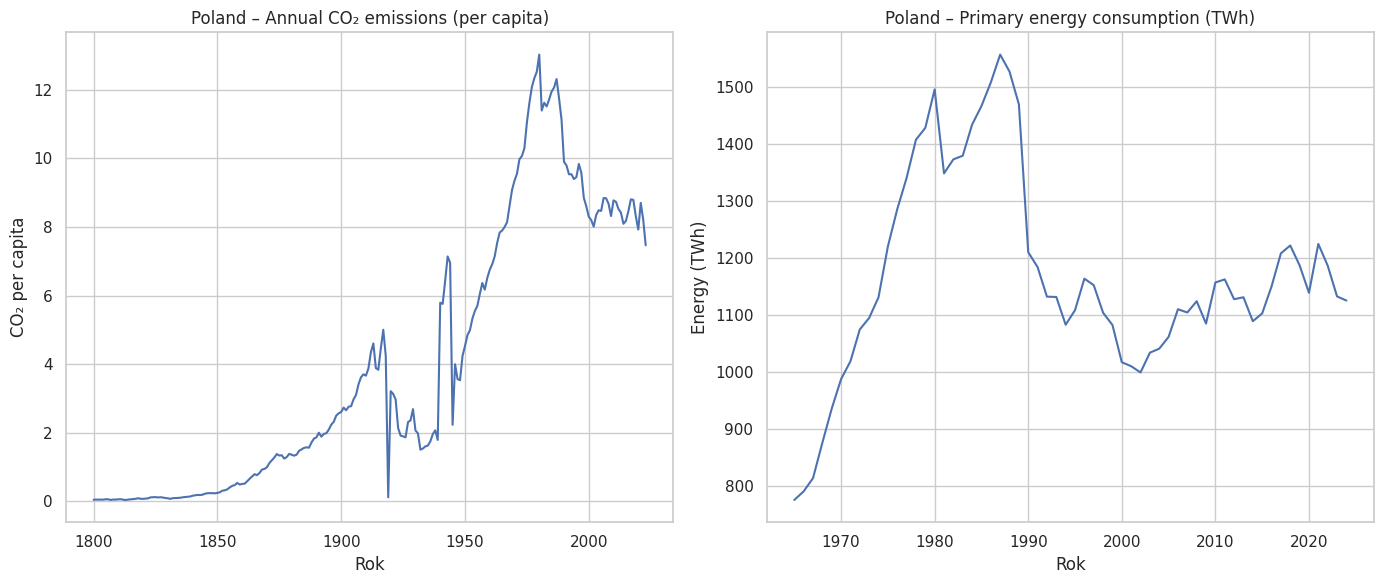

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set(style="whitegrid")


df_co2 = pd.read_csv("co2-emissions-per-capita.csv")
df_energy = pd.read_csv("primary-energy-cons.csv")

print("Kolumny CO2:", df_co2.columns)
print("Kolumny ENERGY:", df_energy.columns, "\n")

co2_col = "Annual CO₂ emissions (per capita)"
energy_col = "Primary energy consumption (TWh)"

df_co2_pl = df_co2[df_co2["Entity"] == "Poland"][["Year", co2_col]]
df_energy_pl = df_energy[df_energy["Entity"] == "Poland"][["Year", energy_col]]

print(df_co2_pl.head())
print(df_energy_pl.head(), "\n")

sample_excel = "sample_data.xlsx"

with pd.ExcelWriter(sample_excel) as writer:
    df_co2_pl.to_excel(writer, sheet_name="CO2", index=False)
    df_energy_pl.to_excel(writer, sheet_name="ENERGY", index=False)

xls = pd.ExcelFile(sample_excel)
df_excel_co2 = pd.read_excel(xls, "CO2")
df_excel_energy = pd.read_excel(xls, "ENERGY")

conn = sqlite3.connect("dane.db")
df_co2.to_sql("co2", conn, if_exists="replace", index=False)
df_energy.to_sql("energy", conn, if_exists="replace", index=False)

query = f"""
SELECT Year, [{energy_col}] AS energy
FROM energy
WHERE Entity='Poland'
"""
df_energy_pl_sql = pd.read_sql(query, conn)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(df_co2_pl["Year"], df_co2_pl[co2_col])
plt.title("Poland – Annual CO₂ emissions (per capita)")
plt.xlabel("Rok")
plt.ylabel("CO₂ per capita")

plt.subplot(1,2,2)
plt.plot(df_energy_pl["Year"], df_energy_pl[energy_col])
plt.title("Poland – Primary energy consumption (TWh)")
plt.xlabel("Rok")
plt.ylabel("Energy (TWh)")

plt.tight_layout()
plt.show()


In [3]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [2]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878
